<a href="https://colab.research.google.com/github/JMML2021/0201-estructures_dades/blob/main/0601_Statistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# - Exercici 1
Agafa un conjunt de dades de tema esportiu que t'agradi i selecciona un atribut del conjunt de dades. Calcula la moda, la mediana, la desviació estàndard i la mitjana aritmètica. 

In [ ]:
- Exercici 1
Agafa un conjunt de dades de tema esportiu que t'agradi i selecciona un atribut del conjunt de dades. Calcula la moda, la mediana, la desviació estàndard i la mitjana aritmètica. 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy.stats as stats
warnings.filterwarnings('ignore')

In [8]:
# Activo Google Drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/01_COLAB/kaggle.json'

In [16]:
# Abro el fichero una vez adecuado

path = ('/content/drive/MyDrive/01_COLAB/resultsFutbol.csv')
df=  pd.read_csv(path)
df.shape

nRow, nCol = df.shape
print(f'Hay  {nRow} filas con {nCol} columnas')

Hay  41243 filas con 9 columnas


In [17]:
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [15]:
resultado['resultado']= df['home_score']
resultado.head()

0    0
1    4
2    2
3    2
4    3
Name: home_score, dtype: object

In [22]:
# Se ve claramente en los extremos perdemos la informacion importantes

df2=df.groupby('country', as_index=False).agg({'home_score': "sum", 'home_score':'count', 'home_score': 'mean'})
df2.head()

,country,home_score
0,Afghanistan,0.875000
1,Albania,1.100000
2,Algeria,1.851485
3,Andorra,0.365079
4,Angola,1.532468


# Nivell 2
- Exercici 3
Continuant amb les dades de tema esportiu, calcula la correlació de tots els atributs entre sí i representa'ls en una matriu amb diferents colors d'intensitat.

# Nueva sección

# - Exercici 2
Continuant amb les dades de tema esportiu, selecciona dos atributs i calcula'n la seva correlació.

In [24]:
!pip install sidetable

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [28]:
# Obtener la frecuencia de ocurrencia con Sidetable
# y nos quedamos con los 10 paises con mas partidos

import sidetable as stb
df.stb.freq(['home_team'])

df1=df[0:9]
df1.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [51]:
# Apilar los __DataFrames__ uno encima del otro
paisesApilados = pd.concat([df['home_team'], df['away_team']], axis=0)
 
paisesApilados = pd.DataFrame(paisesApilados, columns = ['paises'])

df5= paisesApilados.stb.freq(['paises'])
df5= df5[:10]
df5
#type(paisesApilados)

,paises,count,percent,cumulative_count,cumulative_percent
0,Sweden,1014,1.229300,1014,1.229300
1,England,998,1.209902,2012,2.439202
2,Brazil,981,1.189293,2993,3.628495
3,Argentina,979,1.186868,3972,4.815363
4,Germany,946,1.146861,4918,5.962224
5,Hungary,926,1.122615,5844,7.084839
6,Uruguay,882,1.069272,6726,8.154111
7,Mexico,867,1.051087,7593,9.205198
8,South Korea,854,1.035327,8447,10.240526
9,France,838,1.015930,9285,11.256456


In [57]:
np.corrcoef (df['home_score'], df['away_score'])

array([[ 1.        , -0.13513968],
       [-0.13513968,  1.        ]])

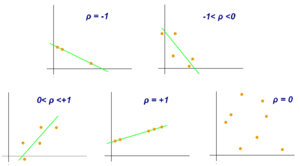

omo0 se ve en el grafico no existe ningna correlacion aparente.
El resultado es una r= -0.135 que es un valor bajo.

Podemos considerar que es totalmente aleatorio

El valor de p es 0 ( 2.5208049949778622e-167)


Dado que este valor de p es menor que .05, concluiríamos que existe una correlación estadísticamente significativa entre las dos variables.

In [54]:
from scipy.stats.stats import pearsonr

pearsonr (df['home_score'], df['away_score'])

(-0.13513967989861936, 2.5208049949778622e-167)

https://statologos.com/correlacion-en-python/#:~:text=Para%20calcular%20la%20correlaci%C3%B3n%20entre,0%20y%2010%20var1%20%3D%20np.

Cómo calcular la correlación en Python

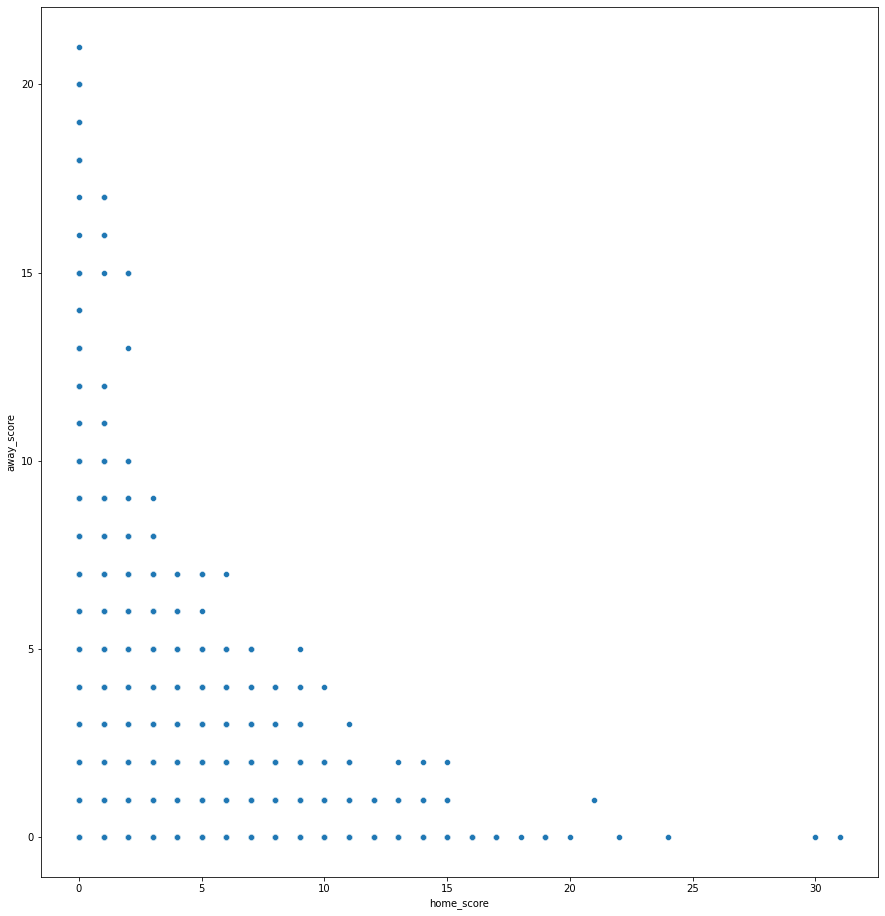

In [55]:
import seaborn as sns 
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(15,16))


sns.axes_style( )  
sns.scatterplot( 'home_score', 'away_score', data= df,  palette="deep")

In [58]:
df.corr ()

,home_score,away_score,neutral
home_score,1.00000,-0.135140,-0.031260
away_score,-0.13514,1.000000,0.084807
neutral,-0.03126,0.084807,1.000000


# Nivell 3
- Exercici 4


Continuant amb les dades de tema esportiu, selecciona un atribut i calcula la mitjana geomètrica i la mitjana harmònica.


La media armónica se corresponde con el recíproco de la media aritmética de los inversos de los datos. Dicho de otro modo, la media armónica de tres valores (x, y, z) será equivalente a 3/(1/x+1/y+1/z).


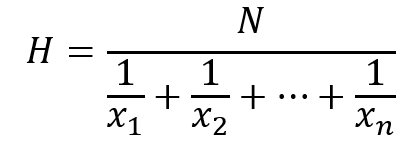

In [64]:
import statistics 

res = statistics.geometric_mean(df['away_score'], 1)  
  
print("The geometric mean of list is : " + str(res)) 

AttributeError: ignored

In [65]:
from scipy.stats import gmean
gmean(df['away_score'])

0.0

In [66]:
df['away_score'].mean()

1.1893169750018184

In [62]:
import statistics 

res = statistics.harmonic_mean(df['away_score']) 
  
print("La media armónica: " + str(res)) 

The harmomin mean of list is : 0


La media armónica no tiene un uso muy extenso en el mundo científico. Suele utilizarse principalmente para calcular la media de velocidades, tiempos o en electrónica.